In [1289]:
from modules.data_modify import *
from modules.load import *
from modules.lstm import *
sns.set()
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

In [1290]:
# ③データの標準化の一括
class _Standard:

    # dictをインスタンスとして定義
    def __init__(self, cols):
        self.data_col = cols

    # データの標準化の一括 1:一般 2:移動平均 3:階差
    def standard_one(self, select: int, df_dict, created_list=[]):

        if select == 1:
            for i in df_dict:
                y = np.array(df_dict[i]).reshape(-1, 1)
                y = scale(y)
                a, y = np.array(y)
                y = np.array(y)
                created_list.append(y)
        df_dict_std = dict(zip(self.data_col, created_list))
        return df_dict_std

    # 一括して標準化
    def standard_all(self, df_con ,created_list=[]):
        dic_list = []

        for i in df_con:
            for j in i:
                # 標準化
                sc = StandardScaler()
                y_std = sc.fit_transform(np.array(i[j]).reshape(-1, 1))
                created_list.append(y_std)
            df_dict_std = dict(zip(self.data_col, created_list))
            dic_list.append(df_dict_std)
            print("完了")
            #created_listを初期化
            created_list =[]

        return dic_list


    
    
# standardデータを渡す df_dict_stdとか
# standardデータを渡す df_dict_stdとか
class _CreateDataset(_Standard):
    #名前をラベルにしたDataSet

    def make_dataset_name(self, df_dict, select:int, time_steps):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 1:
            df_dict = df_dict

        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(len(df_dict[i])-maxlen):
                data.append(df_dict[i][j:j + maxlen])
                target.append(i)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z
    def make_dataset(self, df_dict, select: int, time_steps):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 1:
            df_dict = df_dict

        for i in cols:
            data, target = [], []
            maxlen = time_steps

            for j in range(len(df_dict[i])-maxlen):
                data.append(df_dict[i][j:j + maxlen])
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z


    #ラベルを数値にしたDataSet ストライド付き

    def make_dataset_stride(self,df_dict, select: int, time_steps, stride):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 1:
            df_dict = df_dict

        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
                data.append(df_dict[i][j*stride:j*stride + maxlen])
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z
    
    def make_dataset_stride_ori(self,df_dict,select: int, time_steps, stride ,df_dict_pks):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 1:
            df_dict = df_dict

        for i in df_dict:
            data, target,pks = [], [],[]
            maxlen = time_steps

            for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
                data.append(df_dict[i][j*stride:j*stride + maxlen])
                pks.append(max(df_dict[i][j*stride:j*stride + maxlen])  -  df_dict_pks[i])
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            pk_pk =  np.array(pks).reshape(len(data),1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["pk_pk"] = pk_pk
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z


    def make_dataset_stride_std(self, df_dict,select: int,  time_steps,  stride):
        x, y, z = [], [], []
        h = 0

        #selectの値によって分岐
        if select == 0:
            df_dict = df_dict


        for i in df_dict:
            data, target = [], []
            maxlen = time_steps

            for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
                #時系列データ一つ分
                wave = df_dict[i][j*stride:j*stride + maxlen]
                scaler = StandardScaler()
                scaler.fit(wave)
                wave_std = scaler.transform(wave)
                data.append(wave_std)
                target.append(h)

            re_data = np.array(data).reshape(len(data), maxlen, 1)
            re_target = np.array(target).reshape(len(data), 1)
            csv_data = np.array(data).reshape(len(data), maxlen)
            csv_data = pd.DataFrame(csv_data)
            csv_data["LABEL"] = re_target
            h += 1
            x.append(re_data)
            y.append(re_target)
            z.append(csv_data)

        return x, y, z

    # pandasの形式にデータを変換
    def make_csv(self, name, dataset ,save_data=False):
        con = pd.DataFrame(index=[], columns=[])
        for i,j in enumerate(dataset):
            #save_dataをTrueにすると作製
            con=pd.concat([con,j])
            if save_data:
                j.to_csv("{}{}.csv".format(self.data_col[i],name))
        return con

    # make_csvを使わずにいきなりこっちをつかうとcontatまで行う
    def make_csv_con(self, name, dataset_list, save_data=False, drop=True):
        def make_csv(name, dataset ,save_data=False):
            con = pd.DataFrame(index=[], columns=[])
            for i,j in enumerate(dataset):
                #save_dataをTrueにすると作製
                con=pd.concat([con,j])
                if save_data:
                    j.to_csv("{}{}.csv".format(self.data_col[i],name))
            return con
        con1 = make_csv(name, dataset_list[0], save_data)
        con2 = make_csv(name, dataset_list[1], save_data)
        con3 = make_csv(name, dataset_list[2], save_data)

        # データの統合 con3に関しては最後にLABELのカラムを残すためilocしない
        cons = pd.concat(
            [con1.iloc[:, :-1], con2.iloc[:, :-1],con3], axis=1)

        if drop == True:
            drop_n = sum(
                [True for idx, row in cons.iterrows() if any(row.isnull())])
            cons = cons.dropna()
            print("{}件Nanデータが有ったため削除しました".format(drop_n))
        else:
            pass
        return cons

    # データセットの形状変更 -> (sample, step, feature)
    def make_data(self,concat):
        colms = concat.shape[1]-1
        step = int(colms/3)
        ex1 = concat.iloc[:,0:step]
        ex2 = concat.iloc[:,step:step*2]
        ex3 = concat.iloc[:,step*2:step*3]
        ex1 = np.array(ex1).reshape(-1,step,1)
        ex2 = np.array(ex2).reshape(-1,step,1)
        ex3 = np.array(ex3).reshape(-1,step,1)
        fin = np.concatenate([ex1,ex2,ex3], axis=2)
        pk = concat.iloc[:,-2]
        pk=np.array(pk).reshape(-1,1)
        label = concat.iloc[:,-1]
        label = np.array(label)
        label = label.reshape(-1,1)
        label =one_hot(label)

        return fin,ex1,ex2,ex3,label,pk

    def _check(self,concat,check_rand = 5,check_col="finger"):
        plt.figure(figsize=(12, 4))
        # *0.05 samplingrate=20Hzなので
        plt.plot((np.arange(0, 20))*0.05, concat[200],  label="finger")
        plt.xlim(0, 2)
        plt.ylim(-4, 4)
        plt.xlabel("time [s]")
        plt.ylabel("voltage [V]")
        plt.legend()
        plt.show()

In [1291]:
path =  '/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/'
push_path =  '/Users/ryusei/Desktop/mygit/python_module/lab/fin_data/'

x = np.arange(0,8,0.01)

coll = ["dan","denim","gam","isi","kiban","kutusita","magic","sponge" ,"table","yubi"]

In [1292]:
ls lowpath

1日目/                   gam2.csv                 magic2.csv
1日目.zip                gam3.csv                 magic3.csv
1日目処理済み/           gam4.csv                 magic4.csv
1日目処理済み.zip        isi1.csv                 sponge1.csv
2日目beta/               isi2.csv                 sponge2.csv
2日目beta.zip            isi3.csv                 sponge3.csv
2日目処理済み/           isi4.csv                 sponge4.csv
2日目処理済み.zip        kiban1.csv               table1.csv
dan1.csv                 kiban2.csv               table2.csv
dan2.csv                 kiban3.csv               table3.csv
dan3.csv                 kiban4.csv               table4.csv
dan4.csv                 kutusita1.csv            yubi1.csv
denim1.csv               kutusita2.csv            yubi2.csv
denim2.csv               kutusita3.csv            yubi3.csv
denim3.csv               kutusita4.csv            yubi4.csv
denim4.csv               kutusita5.csv
gam1.csv                 magic1.csv


In [1293]:
def _check_g(li1,li2,li3,li4,li5,coo):
    lili = [li1,li2,li3,li4,li5]
    for i in range(len(lili)):
        plt.plot(lili[i][coo].time,lili[i][coo].volt)
        plt.xlim(5,8)
    plt.show()

In [1294]:
# データの収集とラベル付け
# numに cols{}.csv   {}-> num という形式でcsvファイルを抽出
def get_file(path , num, li=[], cols=[]):
    for coo in coll:
        all_files = glob.glob(path + "*{}*{}.csv".format(coo,num))
        for filename in all_files:
            col = filename.replace(path,"").replace("{}.csv".format(num),"")
            print(filename)
            df = load(filename).iloc[:,1:]
            li.append(df)
            cols.append(col)
    return li, cols

# こっから操作

In [1295]:
coll = ['kutusita', 'sponge', 'yubi', 'table', 'denim', 'dan', 'kiban', 'isi', 'magic', 'gam']

In [1296]:
df_list1, cols1 = get_file(path, num=str(1),  li=[], cols=[])
df_list2, cols2 = get_file(path, num=str(2),  li=[], cols=[])
df_list3, cols3= get_file(path, num=str(3),  li=[], cols=[])
df_list4, cols4 = get_file(path, num=str(4),  li=[], cols=[])

/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/sponge1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/yubi1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/table1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/denim1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/dan1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kiban1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/isi1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/magic1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/gam1.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/kutusita2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/sponge2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/yubi2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/table2.csv
/Users/ryusei/Desktop/mygit/python_module/lab/lowpath/denim2.csv
/Users/ryusei/Desktop/myg

cols
['kutusita',
 'sponge',
 'yubi',
 'table',
 'denim',
 'dan',
 'kiban',
 'isi',
 'magic',
 'gam']

In [1297]:
len(df_list4)

10

In [1298]:
cols = cols1
cols

['kutusita',
 'sponge',
 'yubi',
 'table',
 'denim',
 'dan',
 'kiban',
 'isi',
 'magic',
 'gam']

In [1299]:
df_dict4

{'kutusita': array([2.5100484, 2.5123444, 2.5120776, 2.5128696, 2.512015 , 2.5115445,
        2.5124614, 2.5129147, 2.514706 , 2.5164077, 2.516662 , 2.5176063,
        2.5179343, 2.5179398, 2.5192227, 2.51854  , 2.5179272, 2.5184703,
        2.5181649, 2.518301 , 2.5168047, 2.5162468, 2.5167716, 2.5131922,
        2.5101848, 2.5117002, 2.5146117, 2.5163646, 2.517155 , 2.5181344,
        2.5185876, 2.5185091, 2.518775 , 2.5192788, 2.5192604, 2.518953 ,
        2.519318 , 2.51811  , 2.515979 , 2.5162318, 2.516509 , 2.5168173,
        2.5173345, 2.515757 , 2.5153875, 2.509755 , 2.500085 , 2.5036616,
        2.5115201, 2.5119627, 2.5106537, 2.511    , 2.51295  , 2.514032 ,
        2.5146587, 2.5151117, 2.5153058, 2.5162568, 2.5168006, 2.5174942,
        2.5180352, 2.517713 , 2.5185468, 2.5188072, 2.5186007, 2.5187519,
        2.5177531, 2.5178304, 2.515967 , 2.515158 , 2.515087 , 2.508364 ,
        2.508396 , 2.5139737, 2.5144608, 2.5162337, 2.517361 , 2.5174575,
        2.5182996, 2.51825

In [1368]:
# 靴下, スポンジ、　指, テーブル,　デニム,　ダンボール,　回路基板,  石, マジックテープ,　ガムテープ
# データセットを作成する
def set_dict(df_list,
            data_col):
    datas = []
    diffs = []
    pk_pks = []
    for i in df_list:
        #オリジナルデータの最小値を算出
        pk_pk= min(i.volt)
        
        
        #　オリジナルデータの処理
        y = np.array(i.volt[100:900]).astype("float32").reshape(-1,)
        
        #　階差系列を作成
        diff = pd.DataFrame(y).diff()
        diff= np.array(diff).astype("float32")
        
        
        datas.append(y)
        diffs.append(diff)
        pk_pks.append(pk_pk)
        

    #ディクショナリー型のデータセットを作製　key:value = label:wave
    df_dict = dict(zip(data_col, datas))
    df_dict_diffs = dict(zip(data_col, diffs))
    df_dict_pks = dict(zip(data_col,pk_pks))
    return df_dict, df_dict_diffs , df_dict_pks

In [1369]:
df_dict1, df_dict_diffs1 , df_dict_pks1 = set_dict(df_list1, data_col=cols)

df_dict2, df_dict_diffs2 , df_dict_pks2 = set_dict(df_list2, data_col=cols)

df_dict3, df_dict_diffs3 , df_dict_pks3 = set_dict(df_list3, data_col=cols)

df_dict4, df_dict_diffs4 , df_dict_pks4 = set_dict(df_list4, data_col=cols)

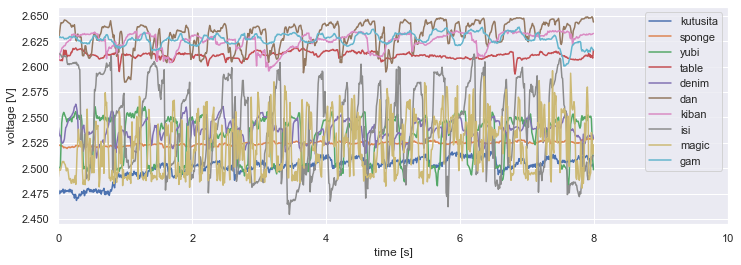

In [1370]:
show_concat(x,df_dict3)

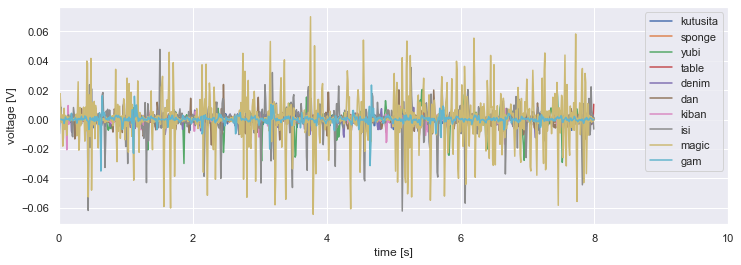

In [1371]:
show_concat(x,df_dict_diffs)

In [1394]:
# 関数から定義するとうまくいく

In [1395]:
df_con1 = [df_dict1, df_dict_diffs1]

df_con2 = [df_dict2, df_dict_diffs2]

df_con3 = [df_dict3, df_dict_diffs3]

df_con4 = [df_dict4, df_dict_diffs4]

In [1400]:
def standard_all(df_con ,created_list=[]):
    dic_list = []

    for i in df_con:
        for j in i:
            # 標準化
            sc = StandardScaler()
            y_std = sc.fit_transform(np.array(i[j]).reshape(-1, 1))
            created_list.append(y_std)
        df_dict_std = dict(zip(cols, created_list))
        dic_list.append(df_dict_std)
        print("完了")
        #created_listを初期化
        created_list =[]

    return dic_list

In [1401]:
# 標準化
sc = StandardScaler()
data_std = sc.fit_transform(np.array(df_dict4["kutusita"]).reshape(-1,1))

In [1402]:
data_std

array([[-2.7393153 ],
       [-2.6137226 ],
       [-2.449077  ],
       [-1.8585659 ],
       [-2.013358  ],
       [-1.9341693 ],
       [-1.7901076 ],
       [-1.7876055 ],
       [-1.5970625 ],
       [-1.6303114 ],
       [-1.4817615 ],
       [-1.3698913 ],
       [-1.2531458 ],
       [-1.5736927 ],
       [-1.8762867 ],
       [-1.6612389 ],
       [-1.593219  ],
       [-1.5532893 ],
       [-1.6888905 ],
       [-1.6888388 ],
       [-1.4953035 ],
       [-1.4402584 ],
       [-1.6198647 ],
       [-1.638514  ],
       [-1.5064726 ],
       [-1.6086957 ],
       [-1.6699831 ],
       [-1.7039543 ],
       [-1.705373  ],
       [-1.3901657 ],
       [-1.3752823 ],
       [-1.6916246 ],
       [-1.4985279 ],
       [-1.4556317 ],
       [-1.5832624 ],
       [-1.5852228 ],
       [-1.4983215 ],
       [-1.2498957 ],
       [-1.3817567 ],
       [-1.096574  ],
       [-1.0345126 ],
       [-1.252114  ],
       [-0.9375515 ],
       [-1.5033772 ],
       [-1.634748  ],
       [-1

In [1403]:
dd = standard_all(df_con4)

完了
完了


In [1404]:
dd[0]["kutusita"]

array([[-2.7393153 ],
       [-2.6137226 ],
       [-2.449077  ],
       [-1.8585659 ],
       [-2.013358  ],
       [-1.9341693 ],
       [-1.7901076 ],
       [-1.7876055 ],
       [-1.5970625 ],
       [-1.6303114 ],
       [-1.4817615 ],
       [-1.3698913 ],
       [-1.2531458 ],
       [-1.5736927 ],
       [-1.8762867 ],
       [-1.6612389 ],
       [-1.593219  ],
       [-1.5532893 ],
       [-1.6888905 ],
       [-1.6888388 ],
       [-1.4953035 ],
       [-1.4402584 ],
       [-1.6198647 ],
       [-1.638514  ],
       [-1.5064726 ],
       [-1.6086957 ],
       [-1.6699831 ],
       [-1.7039543 ],
       [-1.705373  ],
       [-1.3901657 ],
       [-1.3752823 ],
       [-1.6916246 ],
       [-1.4985279 ],
       [-1.4556317 ],
       [-1.5832624 ],
       [-1.5852228 ],
       [-1.4983215 ],
       [-1.2498957 ],
       [-1.3817567 ],
       [-1.096574  ],
       [-1.0345126 ],
       [-1.252114  ],
       [-0.9375515 ],
       [-1.5033772 ],
       [-1.634748  ],
       [-1

In [1405]:
dds = [dd[0], dd[1], df_dict]

In [1406]:
def make_dataset_stride(df_dict, cols , time_steps, stride):
    x, y, z = [], [], []
    h = 0

    for i in cols :
        data, target = [], []
        maxlen = time_steps

        for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
            data.append(df_dict[i][j*stride:j*stride + maxlen])
            target.append(h)
            print(i)

        re_data = np.array(data).reshape(len(data), maxlen, 1)
        re_target = np.array(target).reshape(len(data), 1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data = pd.DataFrame(csv_data)
        csv_data["LABEL"] = re_target
        h += 1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)

    return x, y, z

def make_dataset_stride_ori(df_dict,cols, time_steps, stride ,df_dict_pks):
    x, y, z = [], [], []
    h = 0

    for i in cols:
        data, target,pks = [], [],[]
        maxlen = time_steps

        for j in range(int((len(df_dict[i])-maxlen)/int(stride))):
            data.append(df_dict[i][j*stride:j*stride + maxlen])
            pks.append(max(df_dict[i][j*stride:j*stride + maxlen])  -  df_dict_pks[i])
            target.append(h)
        print(i)

        re_data = np.array(data).reshape(len(data), maxlen, 1)
        re_target = np.array(target).reshape(len(data), 1)
        pk_pk =  np.array(pks).reshape(len(data),1)
        csv_data = np.array(data).reshape(len(data), maxlen)
        csv_data = pd.DataFrame(csv_data)
        csv_data["pk_pk"] = pk_pk
        csv_data["LABEL"] = re_target
        h += 1
        x.append(re_data)
        y.append(re_target)
        z.append(csv_data)

    return x, y, z

In [1413]:
#std
xx,yy,zz= make_dataset_stride(dds[0],cols,20,10)
#オリジナル
xx2,yy2,zz2= make_dataset_stride_ori(dds[2],cols,20,10,df_dict_pks)
# diffs
xx3,yy3,zz3=make_dataset_stride(dds[1],cols,20,10)

kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
kutusita
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
sponge
spon

In [1414]:
dataset_list = [zz,zz3,zz2]

In [1415]:
cons1 = cr.make_csv_con("テストだよ",dataset_list)

10件Nanデータが有ったため削除しました


In [1416]:
cons1 =cons1.reset_index(drop=True)

In [1417]:
cons1


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,pk_pk,LABEL
0,-1.481761,-1.369891,-1.253146,-1.573693,-1.876287,-1.661239,-1.593219,-1.553289,-1.688890,-1.688839,...,2.508146,2.510626,2.509336,2.508714,2.511394,2.513670,2.513998,2.514364,0.020789,0
1,-1.495304,-1.440258,-1.619865,-1.638514,-1.506473,-1.608696,-1.669983,-1.703954,-1.705373,-1.390166,...,2.515138,2.514819,2.515755,2.515152,2.515402,2.516593,2.515724,2.515765,0.022231,0
2,-1.375282,-1.691625,-1.498528,-1.455632,-1.583262,-1.585223,-1.498322,-1.249896,-1.381757,-1.096574,...,2.515671,2.515804,2.515241,2.515289,2.514762,2.509968,2.508136,2.510606,0.022231,0
3,-1.034513,-1.252114,-0.937551,-1.503377,-1.634748,-1.428986,-1.765190,-1.743600,-2.246488,-2.456506,...,2.508324,2.502511,2.505079,2.510591,2.512811,2.514025,2.515221,2.514716,0.022212,0
4,-2.463857,-2.595357,-2.143775,-1.834113,-1.848919,-1.674858,-1.182650,-1.260033,-1.234110,-1.021822,...,2.514652,2.514725,2.514722,2.516044,2.515121,2.514060,2.514893,2.510211,0.021682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.006162,-0.036210,0.044936,0.020303,-0.037106,-0.025013,-0.023018,0.106742,0.318096,0.368705,...,2.633913,2.635133,2.636194,2.638210,2.639091,2.639678,2.641026,2.642073,0.071316,9
766,0.522936,0.638160,0.539507,0.358730,-0.084621,-0.545031,-1.126366,-1.604122,-1.525093,-1.650334,...,2.645028,2.643073,2.642812,2.642813,2.643269,2.644679,2.645741,2.645221,0.076005,9
767,-2.028255,-2.495546,-2.906161,-3.007136,-3.796568,-4.542638,-4.431240,-4.508762,-4.411737,-4.171028,...,2.644082,2.643420,2.644256,2.645247,2.644385,2.643911,2.644056,2.644710,0.076005,9
768,-4.193218,-4.152624,-3.941922,-3.470803,-3.120039,-2.684058,-1.927565,-1.288251,-0.985613,-0.945020,...,2.647999,2.647403,2.646885,2.645350,2.644110,2.644007,2.643961,2.643697,0.077458,9


# ここでファイルをつくる

In [1418]:
cons1.to_csv(push_path+"bb4_20_10.csv")

In [1419]:
cons1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,pk_pk,LABEL
0,-1.481761,-1.369891,-1.253146,-1.573693,-1.876287,-1.661239,-1.593219,-1.553289,-1.688890,-1.688839,...,2.508146,2.510626,2.509336,2.508714,2.511394,2.513670,2.513998,2.514364,0.020789,0
1,-1.495304,-1.440258,-1.619865,-1.638514,-1.506473,-1.608696,-1.669983,-1.703954,-1.705373,-1.390166,...,2.515138,2.514819,2.515755,2.515152,2.515402,2.516593,2.515724,2.515765,0.022231,0
2,-1.375282,-1.691625,-1.498528,-1.455632,-1.583262,-1.585223,-1.498322,-1.249896,-1.381757,-1.096574,...,2.515671,2.515804,2.515241,2.515289,2.514762,2.509968,2.508136,2.510606,0.022231,0
3,-1.034513,-1.252114,-0.937551,-1.503377,-1.634748,-1.428986,-1.765190,-1.743600,-2.246488,-2.456506,...,2.508324,2.502511,2.505079,2.510591,2.512811,2.514025,2.515221,2.514716,0.022212,0
4,-2.463857,-2.595357,-2.143775,-1.834113,-1.848919,-1.674858,-1.182650,-1.260033,-1.234110,-1.021822,...,2.514652,2.514725,2.514722,2.516044,2.515121,2.514060,2.514893,2.510211,0.021682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,-0.006162,-0.036210,0.044936,0.020303,-0.037106,-0.025013,-0.023018,0.106742,0.318096,0.368705,...,2.633913,2.635133,2.636194,2.638210,2.639091,2.639678,2.641026,2.642073,0.071316,9
766,0.522936,0.638160,0.539507,0.358730,-0.084621,-0.545031,-1.126366,-1.604122,-1.525093,-1.650334,...,2.645028,2.643073,2.642812,2.642813,2.643269,2.644679,2.645741,2.645221,0.076005,9
767,-2.028255,-2.495546,-2.906161,-3.007136,-3.796568,-4.542638,-4.431240,-4.508762,-4.411737,-4.171028,...,2.644082,2.643420,2.644256,2.645247,2.644385,2.643911,2.644056,2.644710,0.076005,9
768,-4.193218,-4.152624,-3.941922,-3.470803,-3.120039,-2.684058,-1.927565,-1.288251,-0.985613,-0.945020,...,2.647999,2.647403,2.646885,2.645350,2.644110,2.644007,2.643961,2.643697,0.077458,9


# データの前処理と統合

In [1393]:
ls fin_data/

0to11_200_10.csv  b2_20_10.csv      d1_200_10.csv     eee3_200_5.csv
10_200_10.csv     b3_20_10.csv      d2_200_10.csv     eee4_200_5.csv
11_200_10.csv     b4_20_10.csv      d3_200_10.csv     f1_200_10.csv
1_200_10.csv      bb1_20_10.csv     d4_200_10.csv     f2_200_10.csv
2_200_10.csv      bb2_20_10.csv     d5_200_10.csv     f3_200_10.csv
3_200_10.csv      bb3_20_10.csv     e1_200_10.csv     f4_200_10.csv
4_200_10.csv      c1_10_10.csv      e2_200_10.csv     ff1_50_10.csv
5_200_10.csv      c2_10_10.csv      ee1_200_10.csv    ff2_50_10.csv
af1_50_10.csv     c3_10_10.csv      ee2_200_10.csv    ff3_50_10.csv
af2_50_10.csv     c4_10_10.csv      eee1_200_10.csv   ff4_50_10.csv
af3_50_10.csv     cc1_10_10.csv     eee1_200_5.csv
af4_50_10.csv     cc2_10_10.csv     eee2_200_10.csv
b1_20_10.csv      cc3_10_10.csv     eee2_200_5.csv


In [1427]:
num_list = ["cc1", "cc2","cc3","cc4"]

In [1428]:
# データの収集とラベル付け
# numに cols{}.csv   {}-> num という形式でcsvファイルを抽出
def get_file_test(path , num_list, li=[], cols=[]):
    for i in range(len(num_list)):
        all_files = glob.glob(path + "*{}*.csv".format(num_list[i]))
        for filename in all_files:
            col = filename.replace(path,"").replace("{}.csv".format(num_list[i]),"")
            print(col)
            df = load(filename).iloc[:,1:]
            li.append(df)
            cols.append(col)
    return li, cols

In [1429]:
df_list, cols = get_file_test(push_path, num_list, li=[], cols=[])

cc1_10_10.csv
cc2_10_10.csv
cc3_10_10.csv
cc4_10_10.csv


In [1430]:
concat = pd.concat(df_list,axis=0)

In [1431]:
concat["pk_pk"] = concat["pk_pk"]*1000

In [1432]:
concat

,0,1,2,3,4,5,6,7,8,9,...,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,pk_pk,LABEL
0,0.037313,0.304934,-0.206855,-0.689775,-1.194562,-1.130151,-1.234860,-1.678407,-1.558866,-1.435031,...,2.514056,2.514097,2.515151,2.515065,2.514113,2.514615,2.513168,2.511343,20.788687,0
1,-1.585754,-1.803993,-1.725807,-1.545786,-1.701628,-2.152177,-2.129980,-1.629718,-1.417822,-1.184355,...,2.508146,2.510626,2.509336,2.508714,2.511394,2.513670,2.513998,2.514365,20.002383,0
2,-0.802611,-0.487127,-0.844495,-1.492341,-0.770768,0.090197,-0.356025,-0.203618,-0.011507,-1.185974,...,2.515138,2.514819,2.515755,2.515153,2.515402,2.516593,2.515724,2.515765,22.231358,0
3,-1.584400,-1.291509,-1.048034,-0.544602,-0.879277,-0.816979,-0.103665,-0.752172,-1.340297,-0.727827,...,2.515671,2.515804,2.515241,2.515289,2.514762,2.509968,2.508136,2.510606,22.212046,0
4,-0.530927,-0.910789,-1.548626,-1.698953,-1.458087,-2.117428,-2.066494,-1.626085,-1.898826,-1.405600,...,2.508324,2.502511,2.505079,2.510591,2.512811,2.514025,2.515221,2.514716,20.859021,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.522936,0.638160,0.539507,0.358730,-0.084621,-0.545031,-1.126366,-1.604122,-1.525093,-1.650334,...,2.633913,2.635133,2.636194,2.638210,2.639091,2.639678,2.641026,2.642073,71.315929,9
776,-2.028254,-2.495546,-2.906161,-3.007136,-3.796568,-4.542638,-4.431240,-4.508762,-4.411737,-4.171028,...,2.645028,2.643073,2.642812,2.642813,2.643269,2.644679,2.645741,2.645221,76.004907,9
777,-4.193218,-4.152624,-3.941922,-3.470803,-3.120039,-2.684058,-1.927565,-1.288251,-0.985613,-0.945020,...,2.644082,2.643419,2.644256,2.645247,2.644385,2.643911,2.644056,2.644710,74.626133,9
778,-0.821774,-0.698365,-0.609484,-0.632976,-0.592342,-0.507654,-0.640224,-0.452403,-0.465962,-0.418202,...,2.647999,2.647403,2.646885,2.645350,2.644110,2.644007,2.643961,2.643697,77.457830,9


In [1433]:
concat.to_csv("2日目_10.csv")

In [656]:
fin,ex1,ex2, label, pk = cr.make_data(concat)

ValueError: too many values to unpack (expected 5)

In [42]:
label.shape

(4130, 10)

In [43]:
#　データの作成
X_train, X_test, Y_train, Y_test = train_test_split(fin, label, test_size=0.25,shuffle=False)
X_train2, X_test2, Y_train2,Y_test2 = train_test_split(pk, label, test_size=0.25,shuffle=False, random_state=10)

In [44]:
X_train2.shape

(3097, 1)

In [45]:
Y_train2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# モデルの作成

In [46]:
from tensorflow.keras.layers import concatenate,add
from tensorflow.keras.models import Model

In [47]:
def dnn(X_train):
    i =  Input(shape=( X_train.shape[1]))
    x = Dense(32, activation="relu" )(i)
    x =  Dense(16, activation="relu")(i)
    return x

In [48]:
def lstm(X_train):
    i =  Input(shape=(X_train.shape[1], X_train.shape[2]))
    x =   Bidirectional(LSTM(32, return_sequences=False))(i)
    x =  Dense(16, activation="relu")(i)
    return x

In [49]:
dnn = dnn(X_train2)
lstm = lstm(X_train)

In [50]:
i1 =  Input(shape=( X_train2.shape[1]))
x1 = Dense(32, activation="relu" )(i1)
x1 =  Dense(16, activation="relu")(i1)

i2 =  Input(shape=(X_train.shape[1], X_train.shape[2]))
x2 =   Bidirectional(LSTM(128, return_sequences=False))(i2)
x2 =  Dense(16, activation="relu")(i2)

added = add([x1, x2])

out = Dense(10,activation="softmax")(added)
model = Model(inputs=[i1, i2], outputs=out)


# output = Dense(10,activation="softmax")(x2)
# model = Model
optimizer = Adam()
model.compile(loss="categorical_crossentropy",
                    optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 200, 2)]     0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 16)           32          input_3[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 200, 16)      48          input_4[0][0]                    
_______________________________________________________________________________________

In [51]:
i2 =  Input(shape=(X_train.shape[1], X_train.shape[2]))
x2 =  LSTM(128, return_sequences=False)(i2)

output = Dense(10,activation="softmax")(x2)
model = Model(i2,output)
model.compile(loss="categorical_crossentropy",
                    optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 200, 2)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               67072     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 68,362
Trainable params: 68,362
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(X_train,Y_train,batch_size=32,epochs=5)

Epoch 1/5
97/97 [==============================] - 7s 77ms/step - loss: 2.3071 - accuracy: 0.1114
Epoch 2/5
97/97 [==============================] - 8s 83ms/step - loss: 2.3062 - accuracy: 0.1091
Epoch 3/5
97/97 [==============================] - 8s 84ms/step - loss: 2.3064 - accuracy: 0.1117
Epoch 4/5
97/97 [==============================] - 8s 86ms/step - loss: 2.3054 - accuracy: 0.1191
Epoch 5/5
97/97 [==============================] - 8s 84ms/step - loss: 2.3046 - accuracy: 0.1059


In [57]:
model.evaluate(X_test, Y_test)

33/33 [==============================] - 1s 24ms/step - loss: 2.3227 - accuracy: 0.0639


[2.3227133750915527, 0.06389157474040985]

In [642]:
dee = Deeps()

In [643]:
lst = dee.lstm(X_train)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_73 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 68,874
Trainable params: 68,874
Non-trainable params: 0
_________________________________________________________________


In [784]:
model =  load_model("200_10_lstm.h5")
model.load_weights("200_10_lstm_weight.h5")

In [788]:
model.fit(X_train, Y_train, batch_size=32, epochs=10)

Epoch 1/10
19/19 [==============================] - 3s 140ms/step - loss: 1.5191 - accuracy: 0.4390
Epoch 2/10
19/19 [==============================] - 3s 140ms/step - loss: 1.4195 - accuracy: 0.4678
Epoch 3/10
19/19 [==============================] - 3s 142ms/step - loss: 1.2124 - accuracy: 0.5627
Epoch 4/10
19/19 [==============================] - 3s 139ms/step - loss: 0.9532 - accuracy: 0.6373
Epoch 5/10
19/19 [==============================] - 3s 140ms/step - loss: 0.8564 - accuracy: 0.6898
Epoch 6/10
19/19 [==============================] - 3s 139ms/step - loss: 0.7424 - accuracy: 0.7492
Epoch 7/10
19/19 [==============================] - 3s 139ms/step - loss: 0.7677 - accuracy: 0.7627
Epoch 8/10
19/19 [==============================] - 3s 142ms/step - loss: 0.5129 - accuracy: 0.8525
Epoch 9/10
19/19 [==============================] - 3s 138ms/step - loss: 0.3553 - accuracy: 0.9051
Epoch 10/10
19/19 [==============================] - 3s 144ms/step - loss: 0.2549 - accuracy: 0.9322

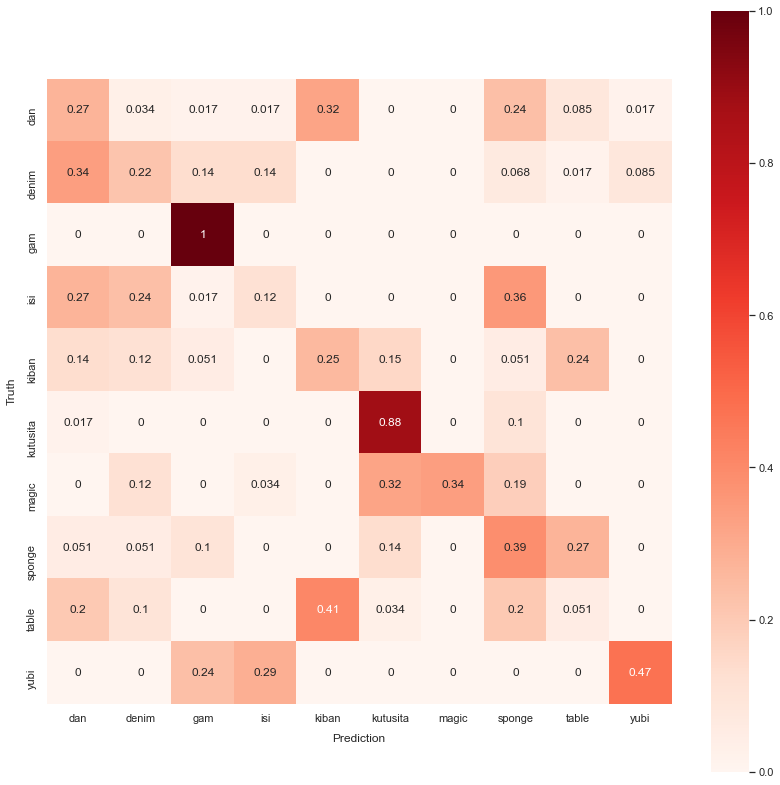

精度:0.400
適合率:0.428
再現率:0.400
f-1値:0.383


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [789]:
pred1 = model.predict(X_test)
Y_acc = np.argmax(Y_test,axis=1)
y_pred1 =np.argmax(pred1,axis=1)
Y_acc = pd.DataFrame(Y_acc)
y_pred1 = pd.DataFrame(y_pred1)
class_names = ["dan","denim","gam","isi","kiban","kutusita","magic","sponge" ,"table","yubi"]
cf_matrix = confusion_matrix(Y_acc, y_pred1)
cd_df = pd.DataFrame(cf_matrix)

cd_df.columns=class_names
cd_df.index=class_names
heat = cd_df.astype('float') / cd_df.sum(axis=1)

sns.set(font_scale=1)
ax = plt.figure(figsize = (14,14))
ax = sns.heatmap(heat, annot=True,square = True,cmap='Reds')
#labelpad -> padding
ax.set_xlabel('Prediction', labelpad=10)
ax.set_ylabel('Truth', labelpad=10)
ax=plt.show()

print('精度:{:.3f}'.format(accuracy_score(Y_acc, y_pred1)))
print('適合率:{:.3f}'.format(precision_score(Y_acc, y_pred1,
                                          pos_label='positive',
                                          average='macro')))
print('再現率:{:.3f}'.format(recall_score(Y_acc, y_pred1,
                                       pos_label='positive',
                                           average='macro')))
print('f-1値:{:.3f}'.format(f1_score(Y_acc, y_pred1,
                                    pos_label='positive',
                                           average='macro')))

In [559]:
# classの外に出してつかう
def cross_val_learn(x_train, y_train, n_split: int):
    kf = KFold(n_splits=n_split, shuffle=False)
    _history = []
    for train_index, val_index in kf.split(x_train, y_train):
        # モデルを更新する  ←　ここに使いたいモデルを直接入力　そうじゃないとモデルの状態が更新されない
        model = dee.lstm(X_train)
        model.compile(optimizer="adam",
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
        model.fit(x=x_train[train_index], y=y_train[train_index],
                batch_size=30, epochs=30, verbose=1)
        _history.append(model.evaluate(
            x=x_train[val_index], y=y_train[val_index], batch_size=30))
    _history = np.asarray(_history)
    loss = np.mean(_history[:, 0])
    acc = np.mean(_history[:, 1])
    print(
        f'loss: {loss} ± {np.std(_history[:, 0])} | acc: {acc} ± {np.std(_history[:, 1])}')
    return model, _history

In [560]:
model, _history = cross_val_learn(fin, label,5)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 128)               67584     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 68,874
Trainable params: 68,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
79/79 [==============================] - 6s 78ms/step - loss: 2.2972 - accuracy: 0.1131
Epoch 2/30
79/79 [==============================] - 6s 76ms/step - loss: 2.2104 - accuracy: 0.1708
Epoch 3/30
79/79 [==============================]

KeyboardInterrupt: 